In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


## One Condition HDDM

#### Load the data and and check data

In [3]:
# Load data from csv file into a NumPy structured array
dataAll = hddm.load_csv('./rt_dataframes/all.csv')
dataAll.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [5]:
dataAll = dataAll.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
dataAll.head(10)


,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


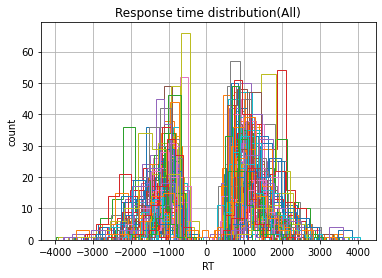

In [6]:
#flip the error RTs to be negative
dataAll = hddm.utils.flip_errors(dataAll)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(All)')
for i, subj_data in dataAll.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('./fitting_results/HDDM/HDDM1C/rt_distribution(All).png')

## Fitting the hierarchical model for one condition with no subject effects

In [40]:
# default model with 4 parameters v,a,z,t, exclude st, sz, eta
m = hddm.HDDM(dataAll, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(10000, burn=5000, dbname='./fitting_results/HDDM/HDDM1C/traces(1C)5000.db', db='pickle')
m.save('./fitting_results/HDDM/HDDM1C/HDDM1C(5000)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/an

 [                  0%                  ] 50 of 10000 complete in 66.2 sec

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting z
Plotting z_std


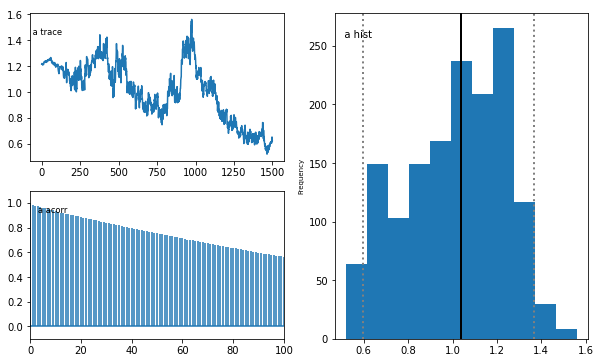

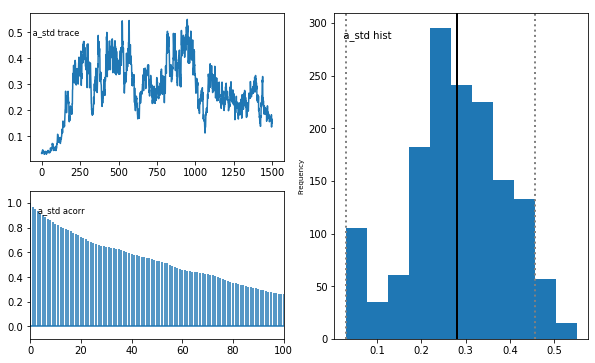

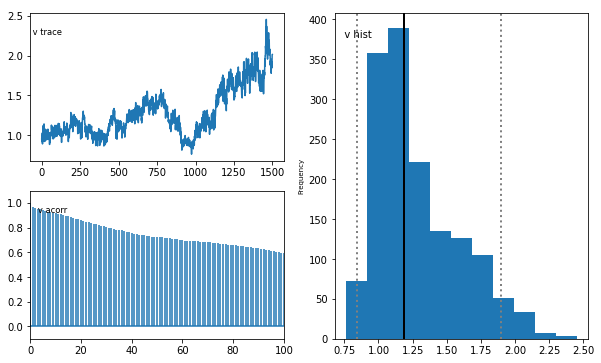

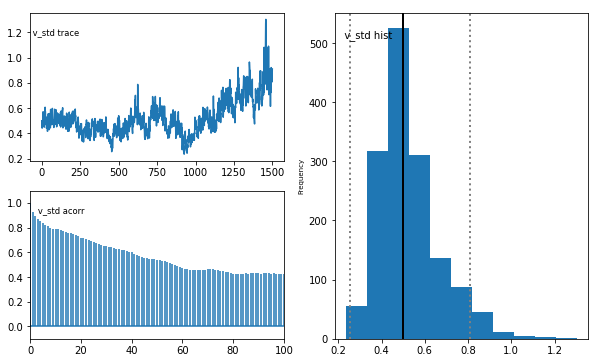

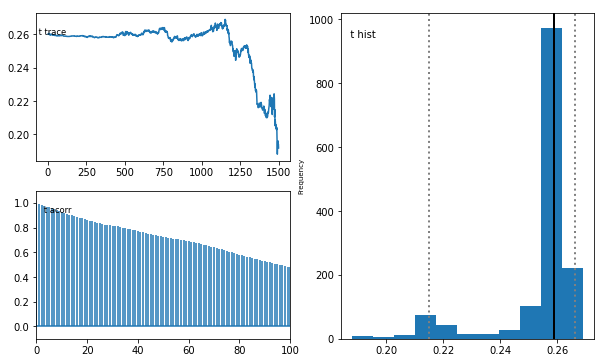

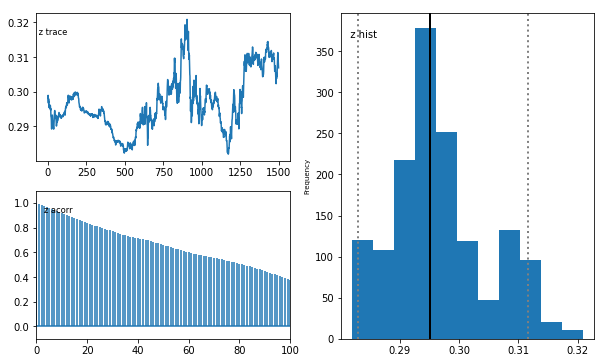

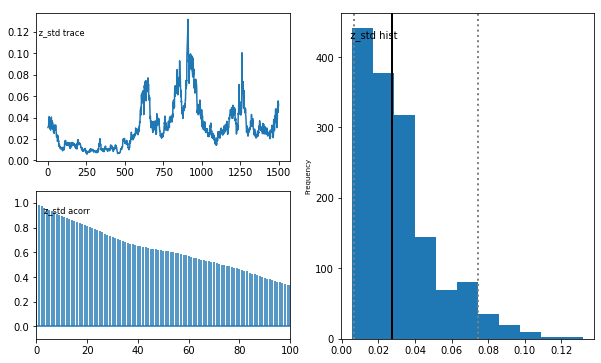

In [21]:
#plot posterior samples
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std','t_std'])

In [22]:
stats1C = m.gen_stats()
stats1C[stats1C.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.0121,0.223899,0.597422,0.849495,1.03768,1.19933,1.37078,0.0220204
a_std,0.280599,0.110396,0.0395272,0.216339,0.281229,0.35601,0.476237,0.0105373
v,1.28148,0.305049,0.88113,1.05258,1.18635,1.46596,2.00584,0.029799
v_std,0.525434,0.143024,0.308917,0.430137,0.499161,0.585901,0.875468,0.0133048
t,0.253954,0.0143334,0.211909,0.256879,0.258856,0.260365,0.265241,0.00142732
t_std,0.00393523,0.00500429,0.00033488,0.00093149,0.00238941,0.00520223,0.0220478,0.000495327
z,0.296756,0.00809082,0.283599,0.2916,0.295128,0.300766,0.31305,0.000792536
z_std,0.0313137,0.0205791,0.00780555,0.0151188,0.027304,0.0395159,0.0850808,0.00200275


## Check for Model convergence

In [24]:
# Set up models list to append results
models = list()

In [29]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(2000, burn=500, dbname = f'chain_{chain_num}', db='pickle')
    print(f'Finished chain {chain_num}')
    return m

In [30]:
num_chains = 5
data_chains = [(dataAll,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models = pool.starmap(fit_hddm_chain, data_chains)

Fitting chain 0
Fitting chain 1
Fitting chain 2Fitting chain 3

Fitting chain 4


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/an

 -----------------83%-----------       ] 1679 of 2000 complete in 2685.6 sec              0%                  ] 2 of 2000 complete in 1.5 sec[                  0%                  ] 2 of 2000 complete in 1.4 sec[                  0%                  ] 2 of 2000 complete in 1.6 sec[                  0%                  ] 2 of 2000 complete in 1.6 sec[                  0%                  ] 3 of 2000 complete in 2.9 sec[                  0%                  ] 3 of 2000 complete in 3.1 sec[                  0%                  ] 3 of 2000 complete in 2.9 sec[                  0%                  ] 3 of 2000 complete in 3.1 sec[                  0%                  ] 3 of 2000 complete in 3.1 sec[                  0%                  ] 4 of 2000 complete in 4.3 sec[                  0%                  ] 4 of 2000 complete in 4.5 sec[                  0%                  ] 4 of 2000 complete in 4.3 sec[                  0%                  ] 4 of 2000 complete in 4.5 sec[                  

FileNotFoundError: [Errno 2] No such file or directory: './fitting_results/HDDM1C/chain_0'

In [36]:
for i, model in enumerate(models):
    model.save(f'./fitting_results/HDDM/HDDM1C/chain_{i}')
print('Finished all chains')

Finished all chains


In [37]:
#check for model loading
models

In [39]:
# check model convergence
results = hddm.analyze.gelman_rubin(models)
print(results)

{'a': 1.4377947476139532, 'a_std': 1.1288252489083228, 'a_subj.00aa64fdcb675341': 1.2481324060989163, 'a_subj.02535fcf7e16bb56': 1.1698997987288984, 'a_subj.06c46b112368babf': 1.2397614776219135, 'a_subj.09ba82a2ca814481': 1.2828928063617537, 'a_subj.0abfc32a4d12c731': 1.2421010058652266, 'a_subj.0b0a94c202d0b233': 1.242052847166983, 'a_subj.0beac20378edac7b': 1.2003012877920305, 'a_subj.0d894551bc966608': 1.2424635127370836, 'a_subj.10d15198ac61a404': 1.2098038463856768, 'a_subj.12a096342c4d052f': 1.2381772440026737, 'a_subj.13e347e32a454872': 1.1722265885364633, 'a_subj.15e0c065b2c11595': 1.2115393229788978, 'a_subj.163b12703c8e5c3c': 1.2408569983985605, 'a_subj.1bf86ff948486447': 1.2276002782410802, 'a_subj.1cb976bac3a2016b': 1.193358601324615, 'a_subj.1ffdcfc59b83c43a': 1.191505912732495, 'a_subj.221e9f16c114b2c0': 1.2639781871184825, 'a_subj.22d84796012679e8': 1.2392497607826944, 'a_subj.247384e4eccc4f80': 1.2147428251681178, 'a_subj.2737c4b829b3018f': 1.1728073075476555, 'a_subj.